In [1]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False

## 插值-interpolate

### 一维插值

> **WARNING**

> 高次`interp1d()`插值的运算量很大，因此对于点数较多的数据，建议使用后面介绍的`UnivariateSpline()`。

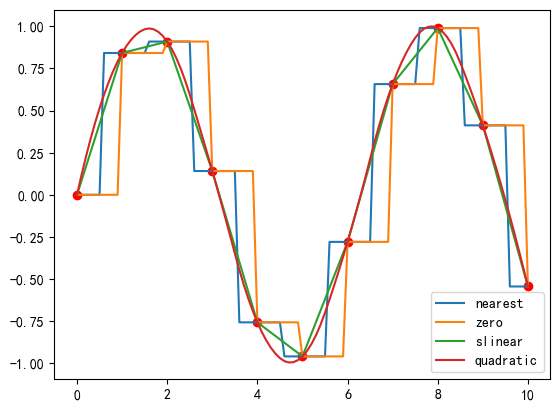

In [2]:
#%fig=`interp1d`的各阶插值
from scipy import interpolate

x = np.linspace(0, 10, 11)
y = np.sin(x)

xnew = np.linspace(0, 10, 101)
plt.plot(x, y, 'ro')

for kind in ['nearest', 'zero', 'slinear', 'quadratic']:
    f = interpolate.interp1d(x, y, kind=kind)  # 创建插值函数❶
    ynew = f(xnew)  # 对新的x值进行插值❷
    plt.plot(xnew, ynew, label=str(kind))

plt.legend(loc='lower right')

# 通过 np.linspace() 在范围 [0, 10] 内生成 11 个等间距的横坐标点，将其保存在 x 中。

# 根据 x 中的横坐标计算对应的纵坐标 y，这里使用 np.sin() 函数将 x 中的值作为输入生成对应的正弦值，并将其保存在 y 中。

# 通过 np.linspace() 在范围 [0, 10] 内生成 101 个等间距的新横坐标点，将其保存在 xnew 中。

# 在图形中绘制原始数据点的散点图。

# 对于不同的插值方式，循环进行以下操作：

# a. 使用 interpolate.interp1d(x, y, kind=kind) 创建插值函数，其中 kind 参数指定了插值方式。

# b. 使用插值函数 f 对新的横坐标 xnew 进行插值，得到对应的纵坐标 ynew。

# c. 在图形中绘制插值后的曲线，其中 label 参数表示插值方式的标签。

# 添加图例，将其放置在右下角。

#### 外推和Spline拟合

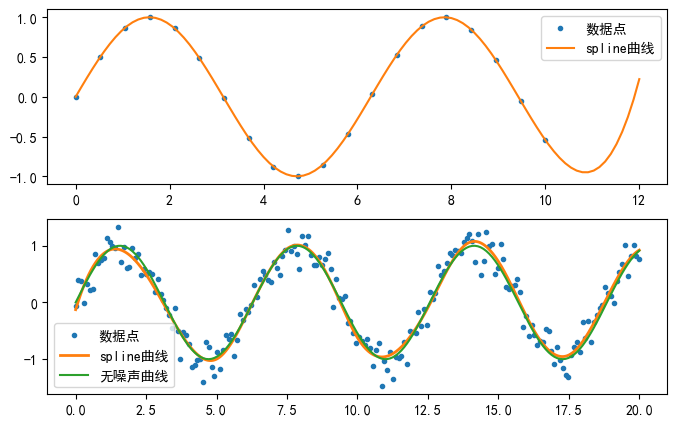

In [3]:
#%fig=使用UnivariateSpline进行插值：外推（上），数据拟合（下）
x1 = np.linspace(0, 10, 20)
y1 = np.sin(x1)
sx1 = np.linspace(0, 12, 100)
sy1 = interpolate.UnivariateSpline(x1, y1, s=0)(sx1)  # 使用UnivariateSpline进行外推插值❶

x2 = np.linspace(0, 20, 200)
y2 = np.sin(x2) + np.random.standard_normal(len(x2)) * 0.2
sx2 = np.linspace(0, 20, 2000)
spline2 = interpolate.UnivariateSpline(x2, y2, s=8)  # 使用UnivariateSpline进行数据拟合❷
sy2 = spline2(sx2)

plt.figure(figsize=(8, 5))
plt.subplot(211)
plt.plot(x1, y1, ".", label="数据点")
plt.plot(sx1, sy1, label="spline曲线")
plt.legend()

plt.subplot(212)
plt.plot(x2, y2, ".", label="数据点")
plt.plot(sx2, sy2, linewidth=2, label="spline曲线")
plt.plot(x2, np.sin(x2), label="无噪声曲线")
plt.legend()


In [4]:
print(np.array_str(spline2.roots(), precision=3))

[ 0.079  3.092  6.28   9.388 12.597 15.756 18.766]


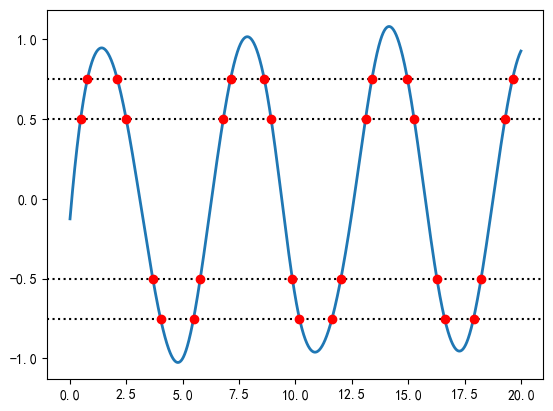

In [5]:
def roots_at(self, v):  
    """
    计算与给定水平线的交点
    """
    coeff = self.get_coeffs()
    coeff -= v
    try:
        root = self.roots()
        return root
    finally:
        coeff += v


interpolate.UnivariateSpline.roots_at = roots_at  

plt.plot(sx2, sy2, linewidth=2, label="spline曲线")

ax = plt.gca()
for level in [0.5, 0.75, -0.5, -0.75]:
    ax.axhline(level, ls=":", color="k")  # 绘制水平参考线
    xr = spline2.roots_at(level)  # 计算与给定水平线的交点
    plt.plot(xr, spline2(xr), "ro")  # 在交点处绘制红色圆点
# 在 UnivariateSpline 类中定义了 roots_at 方法，用于计算曲线与给定水平线的交点。

# 使用 self.get_coeffs() 获取样条曲线的系数，然后将其减去给定的水平线值 v。

# 然后，使用 self.roots() 方法计算出方程的实根，并返回结果。

# 最后，使用修饰器将定义的 roots_at 方法应用到 interpolate.UnivariateSpline 类中。

# 接着，绘制了样条曲线 spline2，并在循环中绘制了一些水平参考线和与水平参考线相交的点。

# 通过这些详细注释，可以更清晰地了解计算样条曲线与水平直线交点的过程和绘制结果的含义。

#### 参数插值

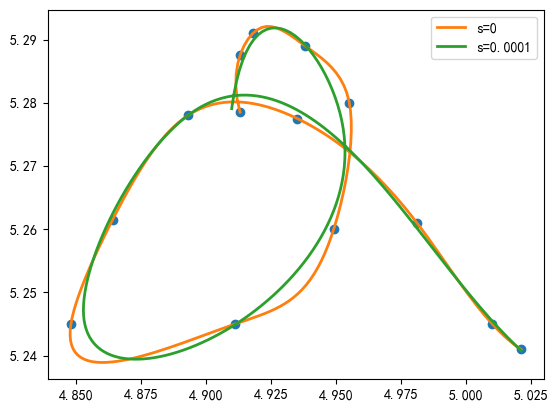

In [6]:
x = [
    4.913, 4.913, 4.918, 4.938, 4.955, 4.949, 4.911, 4.848, 4.864, 4.893,
    4.935, 4.981, 5.01, 5.021
]

y = [
    5.2785, 5.2875, 5.291, 5.289, 5.28, 5.26, 5.245, 5.245, 5.2615, 5.278,
    5.2775, 5.261, 5.245, 5.241
]

plt.plot(x, y, "o")

for s in (0, 1e-4):
    tck, t = interpolate.splprep([x, y], s=s)  # 根据给定点坐标，利用参数插值进行平滑曲线拟合
    xi, yi = interpolate.splev(np.linspace(t[0], t[-1], 200), tck)  # 插值得到平滑曲线上的点
    plt.plot(xi, yi, lw=2, label="s=%g" % s)

plt.legend()
# 在这段代码中，定义了输入点的 x、y 坐标。然后，使用 plt.plot() 绘制出这些点。

# 之后，通过循环遍历参数 s 的两个取值，将输入点的坐标作为参数传入 interpolate.splprep() 函数，利用参数插值进行平滑曲线拟合。该函数返回一个包含参数插值中间结果的元组，以及一个描述参数化曲线参数（t）的数组。

# 接着，使用 interpolate.splev() 函数传入参数化曲线参数 t，获取平滑曲线上的点的坐标（xi, yi）。然后，使用 plt.plot() 绘制出平滑曲线，并设置线宽和标签。

# 最后，使用 plt.legend() 添加图例。

# 这些注释详细说明了代码中使用参数插值连接二维平面上的点的过程，并将结果绘制在图形上。

#### 单调插值

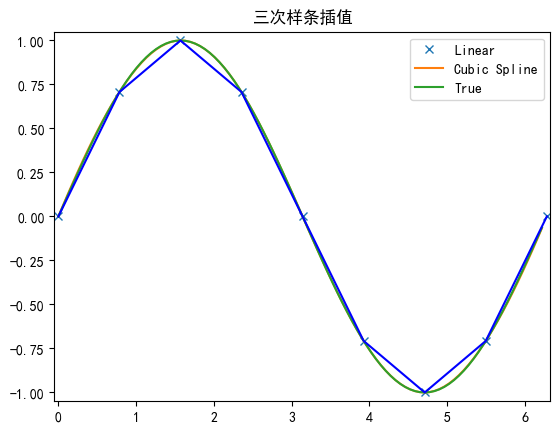

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# 定义输入点的 x、y 坐标
x = np.arange(0, 2 * np.pi + np.pi / 4, 2 * np.pi / 8)
y = np.sin(x)

# 使用样条插值拟合输入点
tck = interpolate.splrep(x, y, s=0)

# 定义新的 x 坐标
xnew = np.arange(0, 2 * np.pi, np.pi / 50)

# 使用样条插值得到新的 y 坐标
ynew = interpolate.splev(xnew, tck, der=0)

# 绘制图形
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('三次样条插值')
plt.show()
# 在这段代码中，首先定义了输入点的 x、y 坐标。然后，在这些点上使用 interpolate.splrep() 函数进行样条插值拟合，得到拟合结果的参数。

# 接下来，定义了新的 x 坐标 xnew，并使用上述样条插值的参数，通过 interpolate.splev() 函数得到新的 y 坐标 ynew，即样条插值拟合的曲线在新的 x 坐标处的值。

# 最后，使用 plt.plot() 绘制了输入点、样条插值的结果曲线和原始函数的图形，并设置了图例、坐标轴范围和标题。

# 通过这些注释，可以清楚地了解代码的功能和绘图结果。

### 多维插值

C:\Users\hechang\AppData\Local\Temp\ipykernel_28532\2481575873.py:14: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')
C:\Users\hechang\AppData\Local\Temp\ipykernel_28532\2481575873.py:19: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`

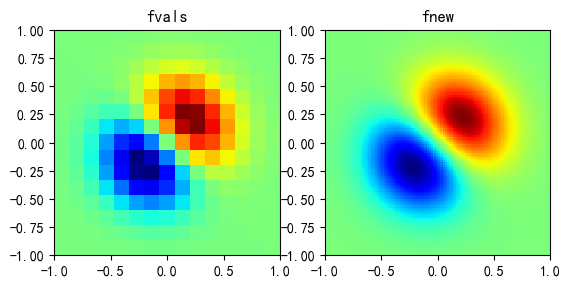

In [8]:
def func(x, y):
    """
    定义一个函数
    """
    return (x + y) * np.exp(-5.0 * (x**2 + y**2))

# 在 x-y 平面上创建一个 15x15 的网格
y, x = np.mgrid[-1:1:15j, -1:1:15j]

# 计算每个网格点上的函数值
fvals = func(x, y)

# 创建二维插值函数对象
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')

# 在一个 100x100 的网格上计算插值的函数值
xnew = np.linspace(-1, 1, 100)
ynew = np.linspace(-1, 1, 100)
fnew = newfunc(xnew, ynew)

# 绘制原始函数和插值函数的图像
plt.subplot(121)
plt.imshow(
    fvals,
    extent=[-1, 1, -1, 1],
    cmap=plt.cm.jet,
    interpolation='nearest',
    origin="lower")
plt.title("fvals")
plt.subplot(122)
plt.imshow(
    fnew,
    extent=[-1, 1, -1, 1],
    cmap=plt.cm.jet,
    interpolation='nearest',
    origin="lower")
plt.title("fnew")
plt.show()
# 这段代码定义了一个二维函数 func(x, y)，并使用 np.mgrid 在 x-y 平面上创建了一个 15x15 的网格。

# 接下来，计算了每个网格点上的函数值，并保存在 fvals 中。

# 然后，使用 interpolate.interp2d 创建了一个二维插值函数对象 newfunc，类型为 'cubic'。

# 在一个 100x100 的网格上计算插值函数的值，并保存在 fnew 中。

# 最后，通过 plt.imshow() 函数绘制了原始函数和插值函数的图像，使用独立的子_

#### griddata

> **WARNING**

> `griddata()`使用欧几里得距离计算插值。如果K维空间中每个维度的取值范围相差较大，则应先将数据正规化，然后使用`griddata()`进行插值运算。

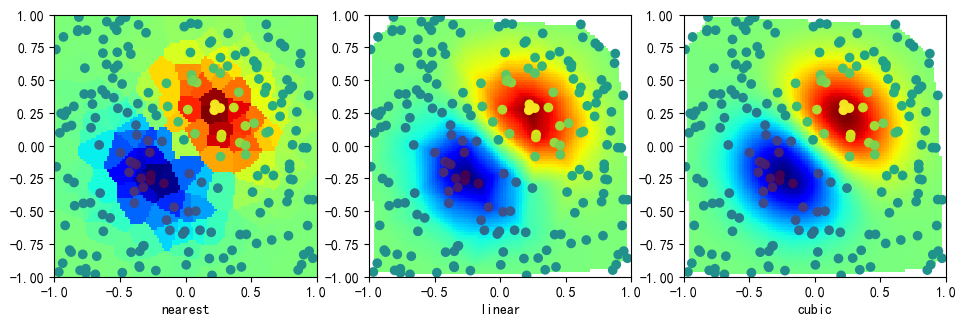

In [9]:
# 计算随机N个点的坐标以及对应的函数值
N = 200
np.random.seed(42)
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
z = func(x, y)

# 创建插值点的网格坐标
yg, xg = np.mgrid[-1:1:100j, -1:1:100j]
xi = np.c_[xg.ravel(), yg.ravel()]

# 选择不同的插值方法进行插值
methods = 'nearest', 'linear', 'cubic'
zgs = [
    interpolate.griddata((x, y), z, xi, method=method).reshape(100, 100)
    for method in methods
]

# 绘制插值结果的图像
fig, axes = plt.subplots(1, 3, figsize=(11.5, 3.5))

for ax, method, zg in zip(axes, methods, zgs):
    ax.imshow(
        zg,
        extent=[-1, 1, -1, 1],
        cmap=plt.cm.jet,
        interpolation='nearest',
        origin="lower")
    ax.set_xlabel(method)
    ax.scatter(x, y, c=z)

plt.show()
# 在这段代码中，首先使用随机数生成了 N 个点的坐标，并计算了这些点对应的函数值。接着，创建了插值点的网格坐标 xi。

# 然后，使用循环遍历不同的插值方法，并使用 interpolate.griddata 方法进行插值。将插值的结果保存在 zgs 列表中。

# 最后，使用 plt.imshow() 和 plt.scatter() 分别绘制了插值结果的图像和原始数据点。

# 通过这些注释，可以更加清晰地了解代码的功能和插值方法的使用。

#### 径向基函数插值

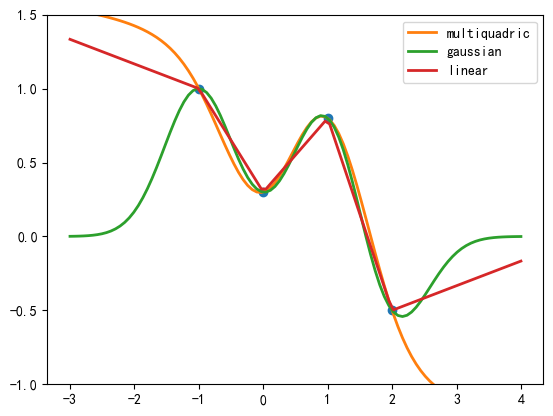

In [10]:
from scipy.interpolate import Rbf

# 定义输入点的 x、y 坐标
x1 = np.array([-1, 0, 2.0, 1.0])
y1 = np.array([1.0, 0.3, -0.5, 0.8])

# 定义 RBF 插值的函数类型
funcs = ['multiquadric', 'gaussian', 'linear']

# 在整个 x 轴上进行插值
nx = np.linspace(-3, 4, 100)

# 创建 Rbf 对象并进行插值
rbfs = [Rbf(x1, y1, function=fname) for fname in funcs]  # 创建 RBF 插值对象
rbf_ys = [rbf(nx) for rbf in rbfs]  # 进行插值得到插值结果

# 绘制原始数据点和插值结果的图像
plt.plot(x1, y1, "o")
for fname, ny in zip(funcs, rbf_ys):
    plt.plot(nx, ny, label=fname, lw=2)

plt.ylim(-1.0, 1.5)
plt.legend()


In [11]:
for fname, rbf in zip(funcs, rbfs):
    print (fname, rbf.nodes)

multiquadric [-0.88822885  2.17654513  1.42877511 -2.67919021]
gaussian [ 1.00321945 -0.02345964 -0.65441716  0.91375159]
linear [-0.26666667  0.6         0.73333333 -0.9       ]


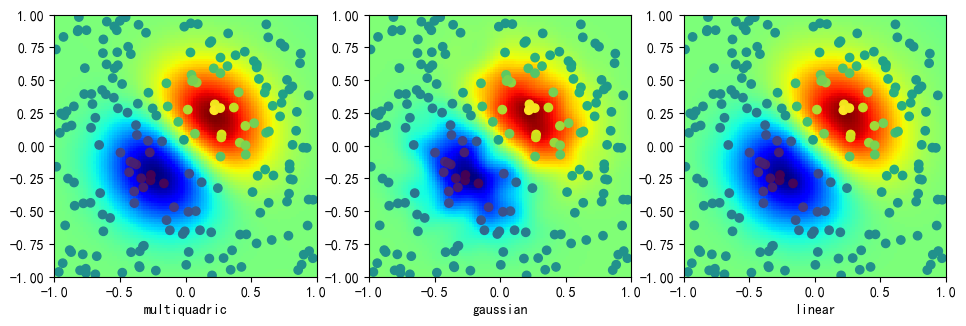

In [12]:
rbfs = [Rbf(x, y, z, function=fname) for fname in funcs]
rbf_zg = [rbf(xg, yg).reshape(xg.shape) for rbf in rbfs]

fig, axes = plt.subplots(1, 3, figsize=(11.5, 3.5))

for ax, fname, zg in zip(axes, funcs, rbf_zg):
    ax.imshow(
        zg,
        extent=[-1, 1, -1, 1],
        cmap=plt.cm.jet,
        interpolation='nearest',
        origin="lower")
    ax.set_xlabel(fname)
    ax.scatter(x, y, c=z)

plt.show()
# 这段代码首先使用循环遍历不同的 RBF 插值函数类型，创建了 Rbf 对象进行插值。

# 然后，通过 rbf(xg, yg) 计算了在网格点 (xg, yg) 处的插值结果，并通过 .reshape(xg.shape) 将结果重新调整为和网格形状一致。

# 接着，使用 plt.subplots() 创建了子图，并使用循环遍历不同的函数类型，绘制了插值结果的图像。

# 绘图中使用 ax.imshow() 函数显示插值结果的图像，使用 ax.set_xlabel() 设置 x 轴标签，使用 ax.scatter() 绘制原始数据点。

# 通过这些注释，可以更加清晰地了解代码的功能、径向基函数插值的使用以及绘图结果。

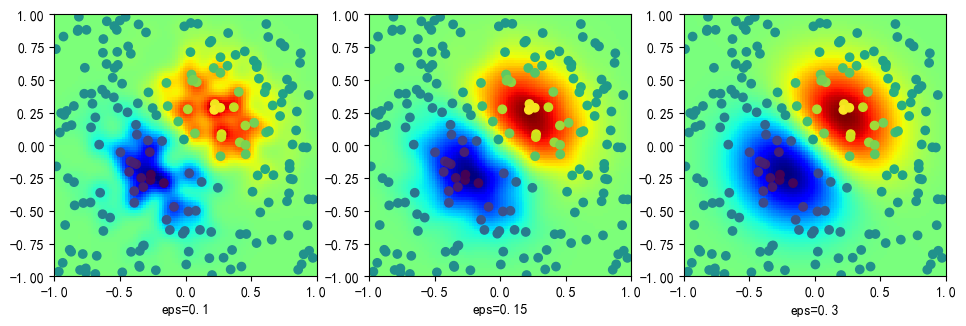

In [13]:
epsilons = 0.1, 0.15, 0.3
rbfs = [Rbf(x, y, z, function="gaussian", epsilon=eps) for eps in epsilons]
zgs = [rbf(xg, yg).reshape(xg.shape) for rbf in rbfs]

fig, axes = plt.subplots(1, 3, figsize=(11.5, 3.5))
for ax, eps, zg in zip(axes, epsilons, zgs):
    ax.imshow(
        zg,
        extent=[-1, 1, -1, 1],
        cmap=plt.cm.jet,
        interpolation='nearest',
        origin="lower")
    ax.set_xlabel("eps=%g" % eps)
    ax.scatter(x, y, c=z)

plt.show()
# 这段代码定义了不同的 epsilon 参数值，然后使用循环遍历这些参数值，创建了相应的 Rbf 对象进行插值。

# 接下来，通过 rbf(xg, yg) 计算了在网格点 (xg, yg) 处的插值结果，并通过 .reshape(xg.shape) 将结果重新调整为和网格形状一致。

# 然后，使用 plt.subplots() 创建了子图，并使用循环遍历不同的 epsilon 值，绘制了插值结果的图像。

# 绘图中使用 ax.imshow() 函数显示插值结果的图像，使用 ax.set_xlabel() 设置 x 轴标签，使用 ax.scatter() 绘制原始数据点。

# 通过这些注释，可以更加清晰地了解代码的功能、 epsilon 参数的作用以及绘图结果。